In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/oren/work/blog/posts/2024/2024-05-09-RE-RL':
  os.chdir(r'/home/oren/work/blog/posts/2024/2024-05-09-RE-RL')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1700493245.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1700493245.0, "/usr/lib/python3.10/codecs.py": 1700493245.0, "/usr/lib/python3.10/encodings/aliases.py": 1700493245.0, "/usr/lib/python3.10/encodings/__init__.py": 1700493245.0, "/usr/lib/python3.10/encodings/utf_8.py": 1700493245.0, "/usr/lib/python3.10/abc.py": 1700493245.0, "/usr/lib/python3.10/io.py": 1700493245.0, "/usr/lib/python3.10/stat.py": 1700493245.0, "/usr/lib/python3.10/_collections_abc.py": 1700493245.0, "/usr/lib/python3.10/genericpath.py": 1700493245.0, "/usr/lib/python3.10/posixpath.py": 1700493245.0, "/usr/lib/python3.10/os.py": 1700493245.0, "/usr/lib/python3.10/_sitebuiltins.py": 1700493245.0, "/usr/lib/python3.10/types.py": 1700493245.0, "/usr/lib/python3.10/warnings.py": 1700493245.0, "/usr/lib/python3.10/importlib/__init__.py": 1700493245.0, "/usr/lib/python3.10/importlib/_abc.py": 1700493245.0, "/usr/lib/python3.10/keyword.py": 1700493245.0, "/u

/tmp/ipykernel_16723/1459046035.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



--- Step 1 ---
New state of the world: 2
Sender 0 sends signal for state 2: C
Receiver 1 receives signals: ['C'] and chooses action: 2
Agent 0 received reward: 1
Agent 1 received reward: 1
Updated weight for option 2_C: 1.0 -> 1.1
Updated weight for option C_2: 1.0 -> 1.1
--- Step 2 ---
New state of the world: 1
Sender 0 sends signal for state 0: B
Receiver 1 receives signals: ['B'] and chooses action: 1
Agent 0 received reward: 1
Agent 1 received reward: 1
Updated weight for option 0_B: 1.0 -> 1.1
Updated weight for option B_1: 1.0 -> 1.1
--- Step 3 ---
New state of the world: 1
Sender 0 sends signal for state 0: B
Receiver 1 receives signals: ['B'] and chooses action: 1
Agent 0 received reward: 1
Agent 1 received reward: 1
Updated weight for option 0_B: 1.1 -> 1.2000000000000002
Updated weight for option B_1: 1.1 -> 1.2000000000000002
--- Step 4 ---
New state of the world: 0
Sender 0 sends signal for state 1: B
Receiver 1 receives signals: ['B'] and chooses action: 0
Agent 0 received

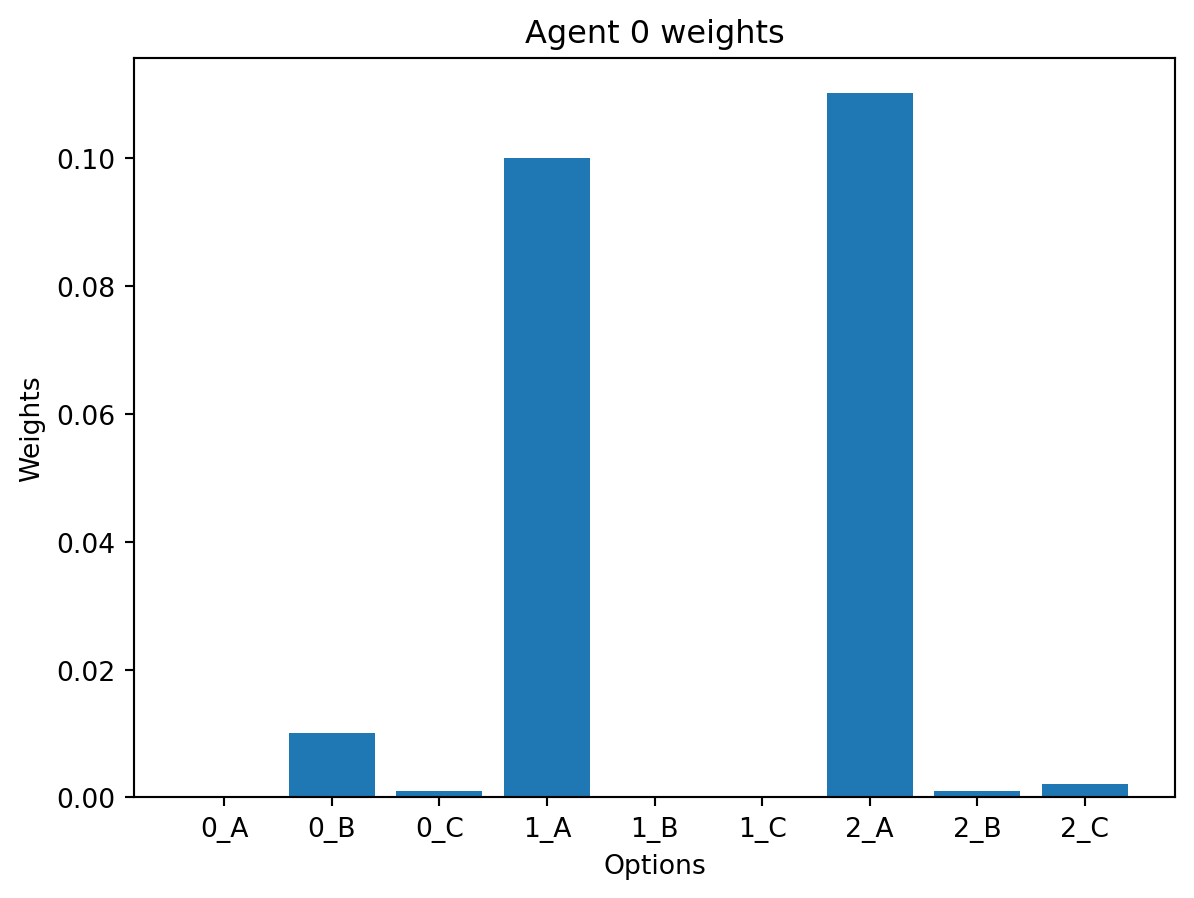

Receiver weights: {'A_0': 0.00011000000000000003, 'A_1': 1.0100000000000003e-05, 'A_2': 0.20011000210000002, 'B_0': 1.1000000000000003e-05, 'B_1': 0.010100011410250001, 'B_2': 0.00010010000000000002, 'C_0': 0.00020000000000000006, 'C_1': 0.00011000000000000003, 'C_2': 0.0010011000000000002}


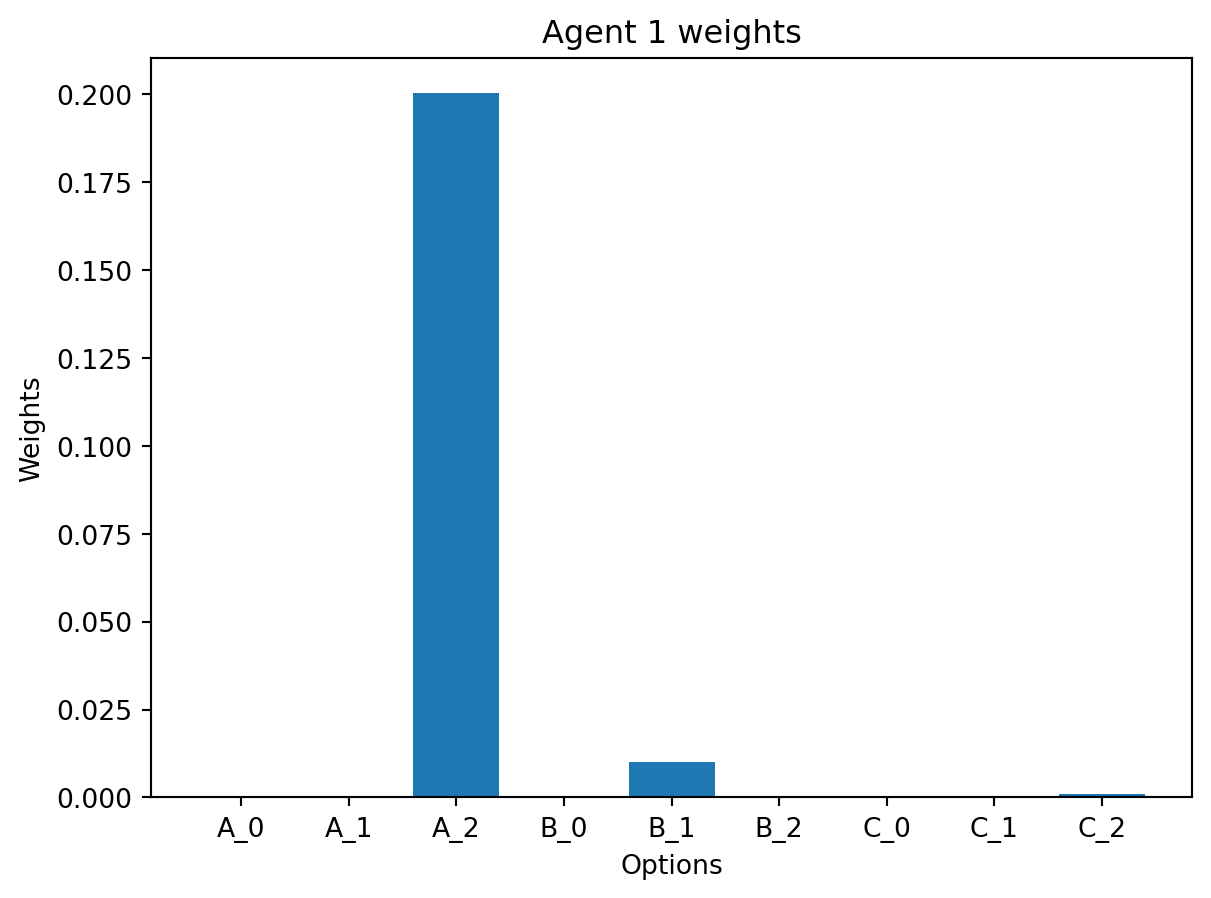

In [2]:
from mesa import Agent, Model
from mesa.time import StagedActivation
import random
import numpy as np
import matplotlib.pyplot as plt

class LearningRule:
    def __init__(self, options, learning_rate=0.1,verbose=False):
        self.verbose = verbose
        if self.verbose:
          print(f'LearningRule.__init__(Options: {options})')
        self.weights = {option: 1.0 for option in options}  # Start with equal weights for all options
        self.learning_rate = learning_rate

    def update_weights(self, option, reward):
        if self.verbose:
          print(f'LearningRule.update_weights({option=}{reward=})')
          print(f"Current weights: {self.weights}")
        
        old_weight = self.weights[option]
        if reward == 1:
            self.weights[option] += self.learning_rate * reward
        else:
            self.weights[option] *= self.learning_rate 
        print(f"Updated weight for option {option}: {old_weight} -> {self.weights[option]}")


    def choose_option(self,filter):
        # we subset the weights by the filter, calcualte their probabilies then
        # then drawn an option frin the filtered option using the probabilites
        if self.verbose:
          print(f'lr_co({filter=})')
        # if filter is int convert to string
        if isinstance(filter,int):
          filter = str(filter)
        #print('keys=',list([k for k in self.weights.keys()] ))
        filter_keys = list([k for k in self.weights.keys() if k.startswith(filter)])
        #print(f"{filter_keys=}")
        weights = {opt: self.weights[opt] for opt in filter_keys}
        total = sum(weights.values())
        probabilities = [weights[opt] / total for opt in weights]
        return np.random.choice(list(weights.keys()), p=probabilities)
      
class LewisAgent(Agent):
    def __init__(self, unique_id, model, learning_options):
        super().__init__(unique_id, model)
        self.message = None
        self.action = None
        self.reward = 0
        self.learning_rule = LearningRule(learning_options, learning_rate=0.1)  # Initialize learning with given options
        
    def send(self):
      return
    
    def receive(self):
      return
    
    def calc_reward(self):
      return

    def set_reward(self):
        self.reward = self.model.reward
        print(f"Agent {self.unique_id} received reward: {self.reward}")
        
    def update_learning(self):
        self.learning_rule.update_weights(self.option, self.reward)  # Update weights based on signals and rewards        

class Sender(LewisAgent):
    def send(self):
        state = self.model.get_state()
        #self.message = self.learning_rule.choose_option(filter=state)  # Send a signal based on the learned weights
        
        self.option = self.learning_rule.choose_option(filter=state)  # Send a signal based on the learned weights
        self.message = self.option.split('_')[1]
        print(f"Sender {self.unique_id} sends signal for state {state}: {self.message}")


class Receiver(LewisAgent):
    def receive(self):
        self.received_signals = [sender.message for sender in self.model.senders]  # Receive signals from all senders
        #print(f"Receiver {self.unique_id} receives signals: {self.received_signals}")
        if self.received_signals:
            for signal in self.received_signals:
                
                self.option = self.learning_rule.choose_option(filter=signal)  # Choose an action based on received signals and learned weights
                self.action = int(self.option.split('_')[1])
                
                print(f"Receiver {self.unique_id} receives signals: {self.received_signals} and chooses action: {self.action}")

    def calc_reward(self):
        correct_action = self.model.current_state
        self.model.reward = 1 if self.action == correct_action else 0
        #print(f"Receiver {self.unique_id} calculated reward: {self.reward} for action {self.action}")

  

class SignalingGame(Model):
    def __init__(self, senders_count=1, receivers_count=1, k=3):
        super().__init__()
        self.k = k
        self.current_state = None

        # Initialize the states, signals, and actions mapping
        self.states = list(range(k))  # States are simply numbers
        self.signals = list(chr(65 + i) for i in range(k))  # Signals are characters
        self.actions = list(range(k))  # Actions are simply numbers

        # generate a list of state_signal keys for the sender's weights
        self.states_signals_keys = [f'{state}_{signal}' for state in self.states for signal in self.signals]
        # generate a list of signal_action keys for the receiver's weights
        self.signals_actions_keys = [f'{signal}_{action}' for signal in self.signals for action in self.actions]

        self.senders = [Sender(i, self, learning_options=self.states_signals_keys) for i in range(senders_count)]
        self.receivers = [Receiver(i + senders_count, self, learning_options=self.signals_actions_keys) for i in range(receivers_count)]
        
        self.schedule = StagedActivation(self, agents = self.senders + self.receivers, stage_list=['send', 'receive', 'calc_reward', 'set_reward', 'update_learning'])

    def get_state(self):
        return random.choice(self.states)

    def step(self):
        self.current_state = self.get_state()
        print(f"New state of the world: {self.current_state}")
        self.schedule.step()

# Running the model
k=3
model = SignalingGame(senders_count=1, receivers_count=1, k=k)
for i in range(k*k*10):
    print(f"--- Step {i+1} ---")
    model.step()

# function to plot agent weights 
def plot_weights(agent):
    weights = agent.learning_rule.weights
    plt.bar(weights.keys(), weights.values())
    plt.xlabel('Options')
    plt.ylabel('Weights')
    plt.title(f'Agent {agent.unique_id} weights')
    plt.show()


#print the agent weights
print('Sender weights:',model.senders[0].learning_rule.weights)
plot_weights(model.senders[0])
print('Receiver weights:',model.receivers[0].learning_rule.weights)
plot_weights(model.receivers[0])